In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Load the datas
customer = pd.read_csv('AdvWorksCusts.csv')
bike = pd.read_csv('AW_BikeBuyer.csv')
ave_spend = pd.read_csv('AW_AveMonthSpend.csv')
test_file = pd.read_csv('AW_test.csv')


In [3]:
customer.head() #the first 5 observations of the data

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


In [4]:
# checking the info of the  data's type
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 23 columns):
CustomerID              16519 non-null int64
Title                   88 non-null object
FirstName               16519 non-null object
MiddleName              9534 non-null object
LastName                16519 non-null object
Suffix                  2 non-null object
AddressLine1            16519 non-null object
AddressLine2            276 non-null object
City                    16519 non-null object
StateProvinceName       16519 non-null object
CountryRegionName       16519 non-null object
PostalCode              16519 non-null object
PhoneNumber             16519 non-null object
BirthDate               16519 non-null object
Education               16519 non-null object
Occupation              16519 non-null object
Gender                  16519 non-null object
MaritalStatus           16519 non-null object
HomeOwnerFlag           16519 non-null int64
NumberCarsOwned         16519

In [5]:
#get the Stat of the Data
customer.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000
mean,20234.225195,0.673891,1.500999,0.992009,2.006235,78122.511532
std,5342.515987,0.468802,1.138962,1.515048,1.682736,39710.985718
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000
25%,15604.500000,0.000000,1.000000,0.000000,0.000000,47807.500000
50%,20221.000000,1.000000,2.000000,0.000000,2.000000,76120.000000
75%,24860.500000,1.000000,2.000000,2.000000,3.000000,105194.500000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000


Explore the bike data

In [6]:
bike.head()

,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1


In [7]:
bike.describe()

,CustomerID,BikeBuyer
count,16519.000000,16519.000000
mean,20234.225195,0.332284
std,5342.515987,0.471046
min,11000.000000,0.000000
25%,15604.500000,0.000000
50%,20221.000000,0.000000
75%,24860.500000,1.000000
max,29482.000000,1.000000


Explore the Average Month Spend Data

In [8]:
ave_spend.head()

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


In [9]:
ave_spend.describe()

,CustomerID,AveMonthSpend
count,16519.000000,16519.000000
mean,20234.225195,72.405957
std,5342.515987,27.285370
min,11000.000000,22.000000
25%,15604.500000,52.000000
50%,20221.000000,68.000000
75%,24860.500000,84.000000
max,29482.000000,176.000000


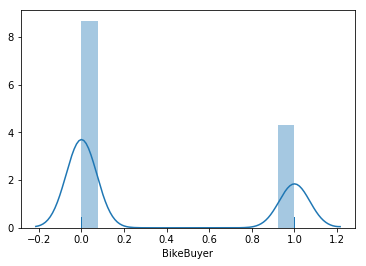

In [10]:
# check the distribution of the bikebuyer 
sns.distplot(bike['BikeBuyer'], hist=True, kde=True, rug=True)

the plot above shows that the number of people with bikes are less than the ones without

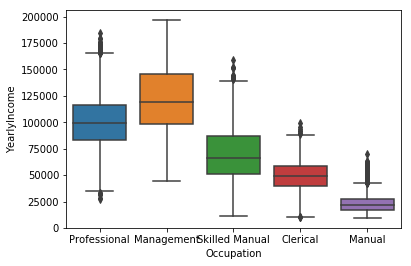

In [11]:
#Select the correct order (from lowest to highest) that ranks the median YearlyIncome by Occupation:
sns.boxplot(x='Occupation',y= 'YearlyIncome', data=customer)

it can be deduce that the medain yearly income of all occupations ranking from L-H are as follows
Manual,Clerical,Skilled Manual , Professional, Management 

In [12]:
# merge customer, bike, average month spend data together as customer 
# First merge customer average month spend data together as customer 
customer = pd.merge(customer,ave_spend, how='inner',on='CustomerID' )

In [13]:
#check the new customer dataframe with AveMonthSpend contained in it
customer.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Bachelors,Professional,M,M,1,0,0,2,137947,89
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Bachelors,Professional,M,S,0,1,3,3,101141,117
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Bachelors,Professional,M,M,1,1,3,3,91945,123
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Bachelors,Professional,F,S,0,1,0,0,86688,50
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Bachelors,Professional,F,S,1,4,5,5,92771,95


In [14]:
#merge Customer and Bike together as customer 
customer = pd.merge(customer, bike, how='inner', on='CustomerID')

In [15]:
# check the customer data with bike data contained in it
customer.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,95,1


In [16]:
#check the features
customer.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'BikeBuyer'],
      dtype='object')

In [17]:
# stat of the customer data
customer.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
count,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000
mean,20200.378523,0.672671,1.508106,0.997211,2.016096,78084.818700,72.494625,0.331513
std,5354.643340,0.469252,1.137949,1.519436,1.685089,39616.621179,27.374399,0.470771
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000
25%,15531.000000,0.000000,1.000000,0.000000,0.000000,47773.000000,52.000000,0.000000
50%,20157.000000,1.000000,2.000000,0.000000,2.000000,76090.000000,68.000000,0.000000
75%,24850.000000,1.000000,2.000000,2.000000,3.000000,105065.000000,84.000000,1.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000


In [18]:
#drop useless features
#customer.drop(['MiddleName','Suffix','AddressLine2'], axis=1, inplace=True)

In [19]:
customer.head().T

,0,1,2,3,4
CustomerID,11000,11001,11002,11003,11004
Title,NaN,NaN,NaN,NaN,NaN
FirstName,Jon,Eugene,Ruben,Christy,Elizabeth
MiddleName,V,L,NaN,NaN,NaN
LastName,Yang,Huang,Torres,Zhu,Johnson
Suffix,NaN,NaN,NaN,NaN,NaN
AddressLine1,3761 N. 14th St,2243 W St.,5844 Linden Land,1825 Village Pl.,7553 Harness Circle
AddressLine2,NaN,NaN,NaN,NaN,NaN
City,Rockhampton,Seaford,Hobart,North Ryde,Wollongong
StateProvinceName,Queensland,Victoria,Tasmania,New South Wales,New South Wales


In [20]:
# use pandas date function to get the accurate age of individual in the data
customer['BirthDate'] = pd.to_datetime(customer['BirthDate'], infer_datetime_format=True,)
customer['Year'] = customer['BirthDate']

In [21]:
customer['Year'].dt.year.head()

0    1966
1    1965
2    1965
3    1968
4    1968
Name: Year, dtype: int64

In [22]:
customer['Age'] = 1998 - customer['Year'].dt.year

In [23]:
test_file['BirthDate'] = pd.to_datetime(test_file['BirthDate'], infer_datetime_format=True,)
test_file['Year'] = test_file['BirthDate']

In [24]:
test_file['Year'].dt.year.head()

0    1945
1    1964
2    1934
3    1958
4    1965
Name: Year, dtype: int64

In [25]:
test_file['Age'] = 1998 - test_file['Year'].dt.year

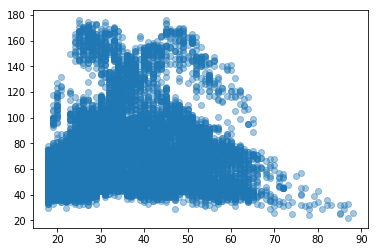

In [26]:
# check the 
plt.Figure(figsize= (30,45))
#plt.legend
x = customer['Age']
y = customer['AveMonthSpend']
hue = customer['Gender']
plt.scatter(x=x, y=y, alpha=0.4)
#sns.scatterplot(x="Age", y='AveMonthSpend', data = customer )

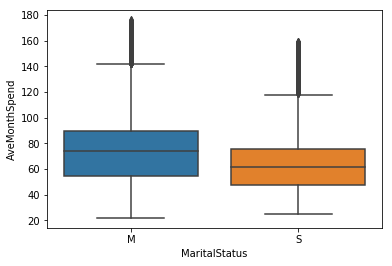

In [27]:
sns.boxplot('MaritalStatus', 'AveMonthSpend', data=customer)

it means that the married guys spend more money monthly than the single guys

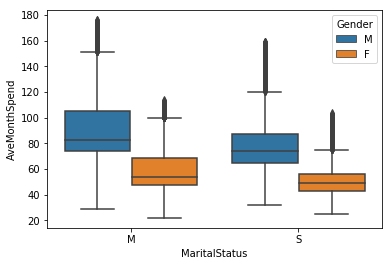

In [28]:
sns.boxplot('MaritalStatus', 'AveMonthSpend', hue = 'Gender' , data=customer)

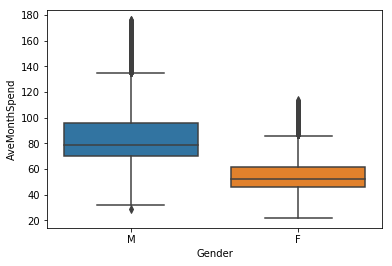

In [29]:
sns.boxplot('Gender', 'AveMonthSpend', data=customer)

it shows that males have a higher median average spent monthly

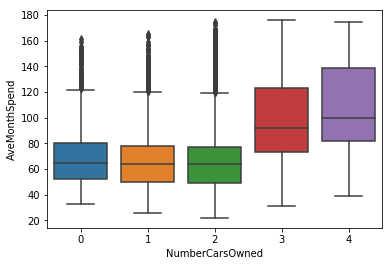

In [30]:
sns.boxplot('NumberCarsOwned', 'AveMonthSpend', data=customer)


here it is obvious that the people with highest(4) number of car owned  spend more money monthly than the others,


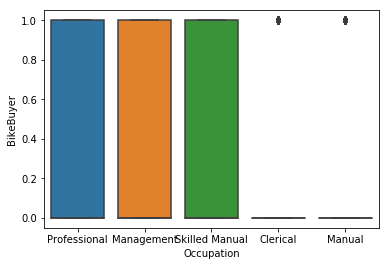

In [31]:
sns.boxplot('Occupation', 'BikeBuyer', data =customer)

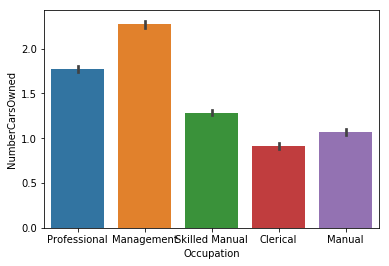

In [32]:
sns.barplot('Occupation', 'NumberCarsOwned', data=customer)

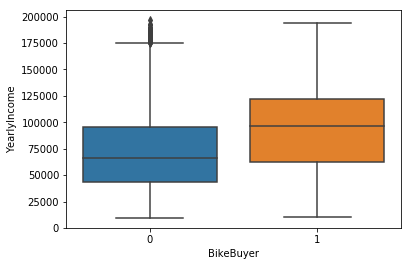

In [33]:
sns.boxplot('BikeBuyer', 'YearlyIncome', data=customer)

the guys with bike tends to have higher yearly income the guys without bike

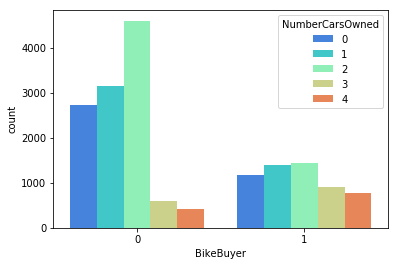

In [34]:
sns.countplot('BikeBuyer', hue='NumberCarsOwned', data = customer, palette= 'rainbow')

the guys without bike own the highest number of cars
the percentage of people without bike and doesn't own car is higher than the people with bike and does not own a car



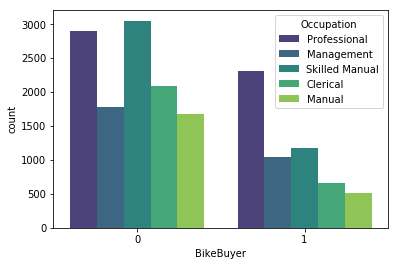

In [35]:
sns.countplot('BikeBuyer', hue='Occupation', data=customer, palette='viridis')

professional is the highest number of  occupation with bike users


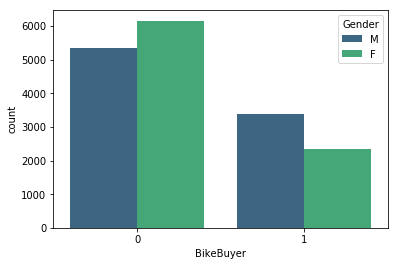

In [36]:
sns.countplot('BikeBuyer', hue='Gender', data=customer, palette='viridis')

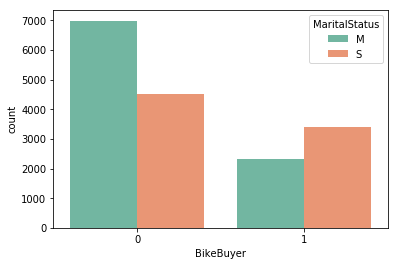

In [37]:
sns.countplot('BikeBuyer', hue='MaritalStatus', data=customer, palette='Set2')

single people with bike are more than married guys with bike 

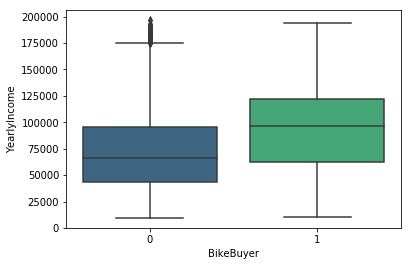

In [38]:
sns.boxplot('BikeBuyer','YearlyIncome', data=customer, palette='viridis')

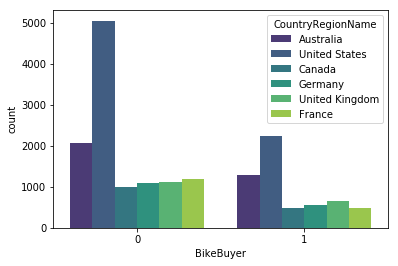

In [39]:
sns.countplot('BikeBuyer', hue='CountryRegionName', data=customer, palette='viridis')

In [40]:
# for a better effective model categorize the features that seems to be 
# in the same continent together
CountryName = {'Australia':'Australia',
                           'Germany':'Europe',
                           'United Kingdom':'Europe', 
                           'France':'Europe',
                           'Canada':'N_america',
                           'United States': 'America'} 
customer['CountryRegionName'] = [CountryName[x] for x in customer['CountryRegionName'] ]
customer['CountryRegionName'].value_counts()

America      7292
Europe       5073
Australia    3355
N_america    1489
Name: CountryRegionName, dtype: int64

In [41]:
# for test file as well
CountryName = {'Australia':'Australia',
                           'Germany':'Europe',
                           'United Kingdom':'Europe', 
                           'France':'Europe',
                           'Canada':'N_america',
                           'United States': 'America'} 
test_file['CountryRegionName'] = [CountryName[x] for x in test_file['CountryRegionName'] ]
test_file['CountryRegionName'].value_counts()

America      225
Europe       140
Australia     86
N_america     49
Name: CountryRegionName, dtype: int64

In [42]:
# drop some useless features
customer.drop(['Year','BirthDate','PhoneNumber'], axis=1 , inplace=True)
test_file.drop(['Year','BirthDate','PhoneNumber'], axis=1 , inplace=True)

check to see if there is any corelation between the bikebuyers and the no of children they have to probaly determine if it will be good predictive feature

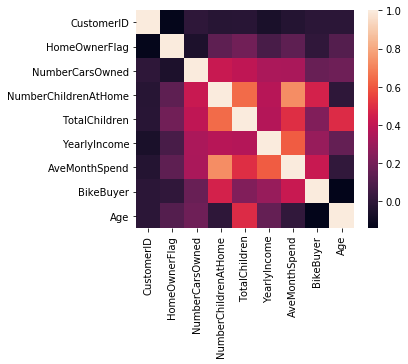

In [43]:
#Heat map
corrmat= customer.corr()
f, ax =plt.subplots(figsize=(5,4))
sns.heatmap(corrmat, square=True)

the value falls on 0.5 and that means that  there is not a strong relation between bikeBuyer and the number of children they have got

In [44]:
col = ['Education','CountryRegionName','MaritalStatus','Gender','Occupation']
customer=pd.get_dummies(customer, columns=col)
test_file=pd.get_dummies(test_file, columns=col)

In [45]:
customer.head().T

,0,1,2,3,4
CustomerID,11000,11001,11002,11003,11004
Title,NaN,NaN,NaN,NaN,NaN
FirstName,Jon,Eugene,Ruben,Christy,Elizabeth
MiddleName,V,L,NaN,NaN,NaN
LastName,Yang,Huang,Torres,Zhu,Johnson
Suffix,NaN,NaN,NaN,NaN,NaN
AddressLine1,3761 N. 14th St,2243 W St.,5844 Linden Land,1825 Village Pl.,7553 Harness Circle
AddressLine2,NaN,NaN,NaN,NaN,NaN
City,Rockhampton,Seaford,Hobart,North Ryde,Wollongong
StateProvinceName,Queensland,Victoria,Tasmania,New South Wales,New South Wales


# some Features Engineering

In [46]:

customer['Female'] = customer['Gender_F']
customer['Male'] = customer['Gender_M']
customer['Single'] = customer['MaritalStatus_S']
customer['Married'] = customer['MaritalStatus_M']
customer['America'] = customer['CountryRegionName_America']
customer['Australia'] = customer['CountryRegionName_Australia']
customer['North America'] =customer['CountryRegionName_N_america']
customer['Europe'] = customer['CountryRegionName_Europe']
customer['Graduate'] = customer['Education_Graduate Degree']
customer['High School'] = customer['Education_High School']
customer['Undergraduate'] = customer['Education_Partial College']
customer['Clerical'] = customer['Occupation_Clerical']
customer['Management'] = customer['Occupation_Management']
customer['Manual'] = customer['Occupation_Manual'] 
customer['Professional'] = customer['Occupation_Professional']
customer['Skilled Manaul'] = customer['Occupation_Skilled Manual']

test_file['Female'] = test_file['Gender_F']
test_file['Male'] = test_file['Gender_M']
test_file['Single'] = test_file['MaritalStatus_S']
test_file['Married'] = test_file['MaritalStatus_M']
test_file['America'] = test_file['CountryRegionName_America']
test_file['Australia'] = test_file['CountryRegionName_Australia']
test_file['North America'] =test_file['CountryRegionName_N_america']
test_file['Europe'] = test_file['CountryRegionName_Europe']
test_file['Graduate'] = test_file['Education_Graduate Degree']
test_file['High School'] = test_file['Education_High School']
test_file['Undergraduate'] = test_file['Education_Partial College']
test_file['Clerical'] = test_file['Occupation_Clerical']
test_file['Management'] = test_file['Occupation_Management']
test_file['Manual'] = test_file['Occupation_Manual'] 
test_file['Professional'] = test_file['Occupation_Professional']
test_file['Skilled Manaul'] = test_file['Occupation_Skilled Manual']
#customer['Undergraduate'] = customer['Education_Bachelors']

In [47]:
#drop some useless features 
customer.drop(['Education_Graduate Degree',
               'Education_High School','Education_Partial College',
              'CountryRegionName_America','CountryRegionName_Australia',
              'CountryRegionName_Europe','CountryRegionName_N_america',
              'MaritalStatus_M','MaritalStatus_S',
              'Gender_F','Gender_M','Education_Partial High School','Occupation_Clerical',
               'Occupation_Management','Occupation_Manual',
              'Occupation_Professional','Occupation_Skilled Manual'], axis=1, inplace=True)
test_file.drop(['Education_Graduate Degree',
               'Education_High School','Education_Partial College',
              'CountryRegionName_America','CountryRegionName_Australia',
              'CountryRegionName_Europe','CountryRegionName_N_america',
              'MaritalStatus_M','MaritalStatus_S',
              'Gender_F','Gender_M','Education_Partial High School','Occupation_Clerical',
               'Occupation_Management','Occupation_Manual',
              'Occupation_Professional','Occupation_Skilled Manual'], axis=1, inplace=True)

# Split The Data For Predicition

In [48]:
import sklearn 
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as ms
from sklearn import preprocessing
import sklearn.metrics as sklm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy.random as nr
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [49]:
from sklearn.model_selection import train_test_split
X = customer[['HomeOwnerFlag','NumberCarsOwned','YearlyIncome','Age','Male','Female','Single',
            'Married','America','Australia','North America','Europe','Graduate','High School','Undergraduate','Clerical','Management',
             'Manual','Professional','Skilled Manaul']]
y = customer['AveMonthSpend']

In [50]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30, random_state=42)

In [51]:
print("{0:0.2f}% in training set".format((len(X_train)/len(customer.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(customer.index)) * 100))

70.00% in training set
30.00% in test set


In [52]:
#predictive testfile features 
test_doc = test_file[['HomeOwnerFlag','NumberCarsOwned','YearlyIncome','Age','Male','Female','Single',
            'Married','America','Australia','North America','Europe','Graduate','High School','Undergraduate','Clerical','Management',
             'Manual','Professional','Skilled Manaul']]

In [53]:
print(X_train.shape) # shape for train data
print(test_doc.shape) # shape for test data

(12046, 20)
(500, 20)


# Scale the data 

scale the data to obtain a optimal model

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
test_doc = scaler.transform(test_doc) 

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(np.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = regression.predict(X_test) 
print_metrics(y_test, y_score, 28)    

Mean Square Error      = 228.08593317856855
Root Mean Square Error = 15.102514134360828
Mean Absolute Error    = 11.414305801065378
Median Absolute Error  = 8.818242107873616
R^2                    = 0.7059469541031866
Adjusted R^2           = 0.7044008134529015


to continue the evaluation of the model performance check the histogram of the residual

C:\Users\OBigVee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


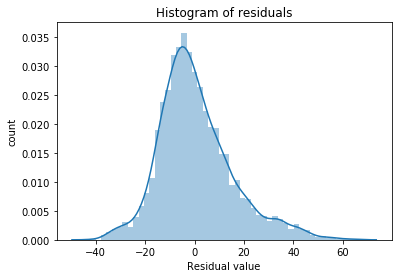

In [58]:
def hist_residual(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_residual(y_test, y_score)    

Q-Q Normal Plot

C:\Users\OBigVee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


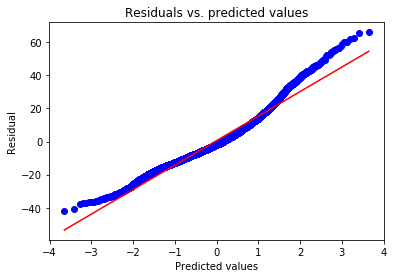

In [59]:
import scipy.stats as ss
def residual_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
residual_qq(y_test, y_score)   

C:\Users\OBigVee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


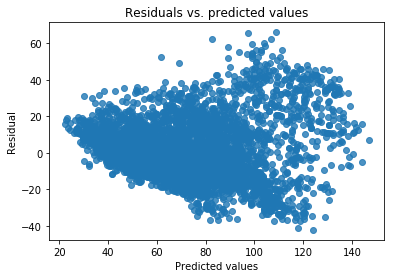

In [60]:
def residual_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

residual_plot(y_test, y_score) 

C:\Users\OBigVee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


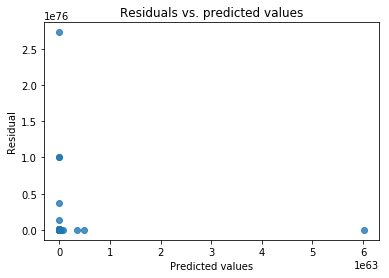

In [61]:
y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test)
residual_plot(y_test_untransform, y_score_untransform) 

In [62]:
gbr=GradientBoostingRegressor (max_depth=5)
gbr.fit(X_train, y_train.ravel())

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

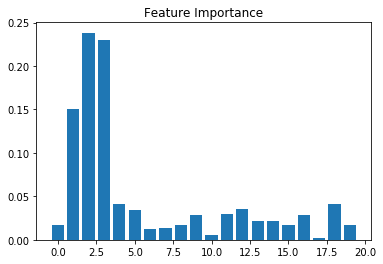

In [63]:
plt.bar(range(len(gbr.feature_importances_)), gbr.feature_importances_)
plt.title('Feature Importance')
plt.show()

In [64]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(np.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = regression.predict(X_test) 
print_metrics(y_test, y_score, 28)    

Mean Square Error      = 228.08593317856855
Root Mean Square Error = 15.102514134360828
Mean Absolute Error    = 11.414305801065378
Median Absolute Error  = 8.818242107873616
R^2                    = 0.7059469541031866
Adjusted R^2           = 0.7044008134529015


In [65]:
print("Accuracy on training set: {:.7f}".format(gbr.score(X_train, y_train.ravel())))
print("Accuracy on test set: {:.7f}".format(gbr.score(X_test, y_test)))

Accuracy on training set: 0.9215844
Accuracy on test set: 0.9070231


In [66]:
import xgboost as xgb
xgb=xgb.XGBRegressor(max_depth=5, n_estimators=100)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

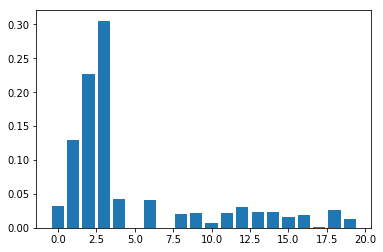

In [67]:
plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
plt.show()

In [68]:
print("Accuracy on training set: {:.7f}".format(xgb.score(X_train, y_train.ravel())))
print("Accuracy on test set: {:.7f}".format(xgb.score(X_test, y_test)))

Accuracy on training set: 0.9190226
Accuracy on test set: 0.9045018


In [70]:
solution=xgb.predict(test_doc)
submission=pd.DataFrame({'CustomerID':test_file.CustomerID,'AveMonthSpend': solution})
submission.to_csv('(reg)XgboostMicrosoft.csv', index=False)